In [2]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

trainset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


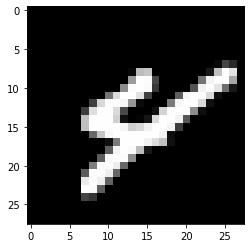

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[3].numpy().squeeze(), cmap="Greys_r")

### Defining Neural network

In [5]:
def activation(x):
    return 1/(1+torch.exp(-x))
    
##Flatten the input images
inputs = images.view(images.shape[0], -1)

##Defining weights and bias
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1) #input layer
output = torch.mm(h, w2)+b2  #hidden layer

print(output.shape)

torch.Size([64, 10])


### Building model with nn Module

In [6]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super.__init__()
        
        self.hidden = nn.Linear(784, 256)
        
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.sigmoid()
        self.softmax = nn.softmax()
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        x = self.sigmoid(x)
        x = self.softmax(x)
        
        return x

## Building Feed forward network

In [7]:
# Model Building
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

#Defining Loss
criteron = nn.CrossEntropyLoss()

#Getting data
images,labels = next(iter(trainloader))

#Flattening image
images = images.view(images.shape[0], -1)

#Forward pass, get out logits
logits = model(images)

loss = criteron(logits, labels)

print(loss)

tensor(2.3359, grad_fn=<NllLossBackward>)


## Using PyTorch Autograd to calculate gradients

Autograd is used to trace the backward operation on gradients

In [8]:
t = torch.randn(2,2, requires_grad=True)

In [9]:
t

tensor([[ 1.0663, -0.2967],
        [ 1.8006, -0.7498]], requires_grad=True)

## Building complete Network

In [18]:
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1)
                     )

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 10

for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"training loss: {running_loss/len(trainloader)}")       
    

training loss: 2.2170375224623853
training loss: 1.927981970788065
training loss: 1.4544711576850176
training loss: 1.018509976772357
training loss: 0.765755649918178
training loss: 0.6320645317022227
training loss: 0.5550009676578965
training loss: 0.5048553200482305
training loss: 0.46987719560609953
training loss: 0.4438949217165965


# Predicting the model

In [29]:
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


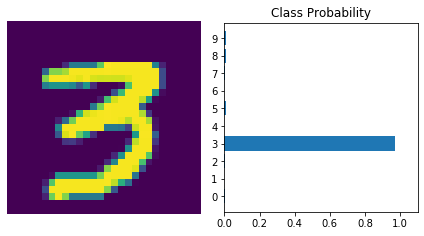

In [31]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)